In [1]:
import os

os.chdir("..")

current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: c:\Users\max-s\Desktop\Uni\Master\Masterthesis\Code\git\overparametrized_dnn


In [2]:
from data.regression_functions import m1, m2, m3, m4, m5, m6, m7, m8
from data.data_generator import get_data, preprocess
from src.my_dnn import create_dnn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import keras

In [5]:
x, y = get_data(m8, x_dim=m8.expected_dim, num_samples=1000)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

train_data = preprocess(x_train, y_train, training=True)
test_data = preprocess(x_test, y_test, training=False)

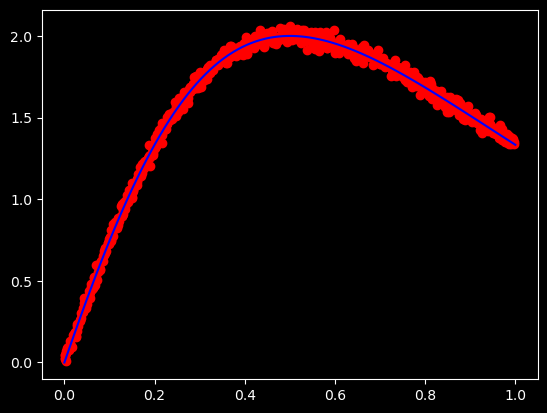

In [9]:
z = np.linspace(0, 1, 100)
h = m1(z)
plt.plot(z, h, label="m1", color="b")
plt.scatter(x_train, y_train, label="train data", color="r")
plt.show()

In [6]:
train_shape = x_train.shape

model = create_dnn(
    train_shape=train_shape,
    num_networks=75,
    num_layers=5,
    num_neurons=15,
    beta=5,
    gamma=10,
    delta=1,
)

In [7]:
optimizer = keras.optimizers.SGD(learning_rate=0.001)
model.compile(
    optimizer=optimizer, 
    loss="mean_squared_error", 
    metrics=["mean_squared_error"]
    )

In [9]:
model.fit(
    train_data,
    epochs=100,
    validation_data=test_data,
    verbose=1,
    callbacks=[keras.callbacks.EarlyStopping(patience=10)],
)

Epoch 1/100


13/13 [==============================] - 1s 64ms/step - loss: 0.4547 - val_loss: 0.5702 - val_mean_squared_error: 0.5702
Epoch 2/100
13/13 [==============================] - 1s 41ms/step - loss: 0.4672 - val_loss: 0.5157 - val_mean_squared_error: 0.5157
Epoch 3/100
13/13 [==============================] - 1s 40ms/step - loss: 0.4568 - val_loss: 0.5316 - val_mean_squared_error: 0.5316
Epoch 4/100
13/13 [==============================] - 1s 39ms/step - loss: 0.4551 - val_loss: 0.5190 - val_mean_squared_error: 0.5190
Epoch 5/100
13/13 [==============================] - 1s 40ms/step - loss: 0.4584 - val_loss: 0.5172 - val_mean_squared_error: 0.5172
Epoch 6/100
13/13 [==============================] - 1s 39ms/step - loss: 0.4690 - val_loss: 0.5106 - val_mean_squared_error: 0.5106
Epoch 7/100
13/13 [==============================] - 1s 40ms/step - loss: 0.4588 - val_loss: 0.5077 - val_mean_squared_error: 0.5077
Epoch 8/100
13/13 [==============================] - 1s 51ms/step - loss: 0.4806 

In [12]:
x_val, y_val = get_data(m8, x_dim=m8.expected_dim, num_samples=10**5)
validation_data = preprocess(x_val, y_val, training=False)

model.evaluate(validation_data)

1563/1563 [==============================] - 22s 14ms/step - loss: 0.5332 - mean_squared_error: 0.5332


[0.5331792235374451, 0.5331792235374451]

4/4 [==============================] - 1s 36ms/step


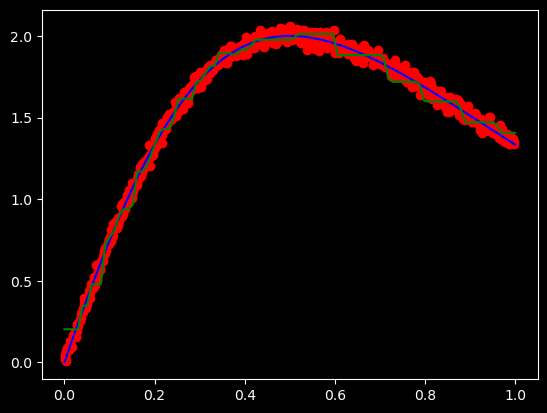

In [27]:
z = np.linspace(0, 1, 100)
h = m1(z)
h_pred = model.predict(z)
plt.plot(z, h, label="m1", color="b")
plt.plot(z, h_pred, label="m1_pred", color="g")
plt.scatter(x_train, y_train, label="train data", color="r")
plt.show()

In [10]:
import tensorflow as tf

def test_norm_l1(model):
    # Test if L1 projection of last layer worked
    weights = tf.reshape(model.trainable_variables[-1], [-1])
    norm = tf.norm(weights, ord=1)
    print("norm: {}, gamma: {}".format(norm, model.gamma))


def test_norm_l2(model):
    # Test if L2 projection of inner weights worked
    current_weights = tf.concat(
        [tf.reshape(v, [-1]) for v in model.trainable_weights[:-1]], axis=0
    )
    sub_nets_init_weights = model.sub_nets_init_weights
    diff = sub_nets_init_weights - current_weights
    norm = tf.norm(diff)
    print("norm: {}, delta: {}".format(norm, model.delta))

In [11]:
test_norm_l1(model)
test_norm_l2(model)

norm: 2.9938626289367676, gamma: 10
norm: 0.09124743938446045, delta: 1.0
